In [1]:
# ============================== #
# 1. Install dependencies (Kaggle does not come with these preinstalled)
# ============================== #
!pip install -q -U transformers accelerate peft bitsandbytes datasets scikit-learn tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 82.1 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.1/411.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 22.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 83.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.

In [2]:
# ============================== #
# 2. Import Libraries
# ============================== #
import warnings
warnings.filterwarnings("ignore")

from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PeftModel
from sklearn.metrics import accuracy_score, f1_score
from datasets import load_dataset
from tqdm import tqdm
import torch

2025-05-25 01:15:04.509719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748135704.719715      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748135704.779542      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# ============================== #
# 3. Set Model and Tokenizer
# ============================== #
base_model = "NousResearch/Llama-2-13b-hf"
peft_model = "oliverwang15/FinGPT_v33_Llama2_13B_Sentiment_Instruction_LoRA_FT_8bit"

tokenizer = AutoTokenizer.from_pretrained(base_model, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token  # Required for padding

bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,
    llm_int8_threshold=6.0,
    llm_int8_has_fp16_weight=False
)

model = AutoModelForCausalLM.from_pretrained(
    base_model,
    device_map="auto",
    quantization_config=bnb_config,
    torch_dtype=torch.float16
)

model = PeftModel.from_pretrained(model, peft_model)
model.eval()

tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/196 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/448 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/26.3M [00:00<?, ?B/s]

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32000, 5120, padding_idx=0)
        (layers): ModuleList(
          (0-39): 40 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear8bitLt(
                (base_layer): Linear8bitLt(in_features=5120, out_features=5120, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.1, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=5120, out_features=8, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=8, out_features=5120, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
            

In [4]:
# ============================== #
# 4. Helper Functions
# ============================== #
label_map = {0: "negative", 1: "neutral", 2: "positive"}

def format_example(example: dict) -> dict:
    context = f"Instruction: {example['instruction']}\n"
    if example.get("input"):
        context += f"Input: {example['input']}\n"
    context += "Answer: "
    target = example["output"]
    return {"context": context, "target": target}

def change_target(x):
    x = x.lower()
    if 'positive' in x:
        return 'positive'
    elif 'negative' in x:
        return 'negative'
    else:
        return 'neutral'

# *Here i tried Few Shot Prompting that got 60% acc*

In [ ]:
#def prompt_fun_few_shot(row):
    # Define few-shot examples (ideally 2–3)
 #   few_shot_prompt = (
  #      "Determine the sentiment of the following financial news headlines. "
   #     "Respond with one word: Negative, Neutral, or Positive.\n\n"
    #    "Example 1:\n"
     #   "Input: Company X's shares dropped after a disappointing earnings report.\n"
      #  "Answer: Negative\n\n"
       # "Example 2:\n"
        #"Input: The central bank maintained current interest rates.\n"
        #"Answer: Neutral\n\n"
    #    "Example 3:\n"
     #   "Input: Tech firm Y reported record profits this quarter.\n"
      #  "Answer: Positive\n\n"
       # "Now analyze the following news:\n"
   # )

    # Append the current input
    #input_text = f"Input: {row['input']}\nAnswer: "
    #return few_shot_prompt + input_text


# *Here tried zero shot prompting with a direct instruction that got 84% acc*

In [ ]:
#def better_zero_shot_prompt(row):
  #  return (
     #   "Analyze the following financial news and determine the sentiment it expresses. "
     #   "Choose only one: Negative, Neutral, or Positive. "
     #   "Respond with only one word and no explanation.\n"
      #  f"Input: {row['input']}\n"
       # "Answer:"
    #)


# *Here i did chain of thought prompting that got 86% acc*

In [ ]:
#def chain_of_thought_prompt(row):
   # return (
      #  "You are a financial sentiment expert. First, think step-by-step to determine if the following news expresses optimism, pessimism, or is neutral. "
       # "Then give your final answer as one word: Negative, Neutral, or Positive.\n\n"
        #f"Input: {row['input']}\n"
       # "Reasoning: "
   # )


# *Here was the standard prompting that got 88% - 87% acc*

# *Meta Prompting*

In [5]:
# def meta_prompting_chain_of_thought(row):
#     return (
#         "You are a financial sentiment expert. Your task is not just to classify sentiment, but to design the best reasoning strategy to do so.\n"
#         "First, decide what reasoning steps would help determine if the news expresses optimism, pessimism, or neutrality.\n"
#         "Then, apply your own strategy to analyze the input.\n"
#         "Finally, classify the sentiment using one word only: Negative, Neutral, or Positive.\n\n"
        
#         f"Input: {row['input']}\n"
#         "Step-by-step reasoning strategy: \n"
#         "Applied reasoning: \n"
#         "Answer: "
#     )


# *Generated Knowledge Prompting*

In [8]:
# def generated_knowledge_prompting(row):
#     return (
#         "You are a financial sentiment expert with access to relevant background knowledge that improves your understanding of financial news.\n"
#         "First, generate factual, finance-related background knowledge that helps interpret the input more accurately.\n"
#         "Then, use this knowledge to analyze the sentiment of the input.\n"
#         "Finally, classify the sentiment using one word only: Negative, Neutral, or Positive.\n\n"
        
#         f"Input: {row['input']}\n"
#         "Knowledge:\n"
#         "Sentiment analysis using the knowledge:\n"
#         "Answer:"
#     )


# *Prompt chaining*

In [11]:
# def prompt_chaining_financial_sentiment(row):
#     return (
#         "You are a financial sentiment expert. Your task is to classify the sentiment of financial news using two steps: knowledge generation and reasoning.\n\n"
        
#         "Step 1 - Generate relevant financial or economic background knowledge to help interpret the input.\n"
#         "Step 2 - Use that knowledge to reason about the sentiment of the news.\n"
#         "Finally, classify the sentiment in one word only: Negative, Neutral, or Positive.\n\n"
        
#         f"Input: {row['input']}\n"
#         "Step 1 - Knowledge:\n"
#         "Step 2 - Reasoning:\n"
#         "Answer:"
#     )


In [12]:
# ============================== #
# 5. Main Evaluation Function
# ============================== #
def test_fpb(model, tokenizer, batch_size=4, prompt_fun=None):
    data = load_dataset("financial_phrasebank", "sentences_50agree")["train"]
    data = data.train_test_split(seed=42)['test']
    df = data.to_pandas()
    df.columns = ["input", "output"]
    df["output"] = df["output"].apply(lambda x: label_map[x])

    if prompt_fun is None:
        df["instruction"] = "What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}."
    else:
        df["instruction"] = df.apply(prompt_fun, axis=1)

    df[["context", "target"]] = df.apply(format_example, axis=1, result_type="expand")

    print(f"\nPrompt Example:\n{df['context'].iloc[0]}\n")

    context = df['context'].tolist()
    total_steps = len(context) // batch_size + 1

    print(f"Evaluating {len(context)} samples with batch size {batch_size}...")

    out_text_list = []
    for i in tqdm(range(total_steps)):
        tmp_context = context[i * batch_size:(i + 1) * batch_size]
        if not tmp_context:
            continue
        tokens = tokenizer(tmp_context, return_tensors='pt', padding=True, truncation=True, max_length=512)
        tokens = {k: v.cuda() for k, v in tokens.items()}
        with torch.no_grad():
            res = model.generate(**tokens, max_length=512, pad_token_id=tokenizer.eos_token_id)
        decoded = tokenizer.batch_decode(res, skip_special_tokens=True)
        extracted = [text.split("Answer: ")[-1].strip() for text in decoded]
        out_text_list.extend(extracted)
        torch.cuda.empty_cache()

    df["out_text"] = out_text_list
    df["new_target"] = df["target"].apply(change_target)
    df["new_out"] = df["out_text"].apply(change_target)

    acc = accuracy_score(df["new_target"], df["new_out"])
    f1_macro = f1_score(df["new_target"], df["new_out"], average="macro")
    f1_micro = f1_score(df["new_target"], df["new_out"], average="micro")
    f1_weighted = f1_score(df["new_target"], df["new_out"], average="weighted")

    print(f"\n✅ Evaluation Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Macro: {f1_macro:.4f}")
    print(f"F1 Micro: {f1_micro:.4f}")
    print(f"F1 Weighted: {f1_weighted:.4f}")

    return df

In [13]:
# ============================== #
# 6. Run Evaluation
# ============================== #
#results_df = test_fpb(model, tokenizer, batch_size=4)
instructions_df = test_fpb(model, tokenizer, batch_size=8, prompt_fun=generated_knowledge_prompting)



Prompt Example:
Instruction: You are a financial sentiment expert with access to relevant background knowledge that improves your understanding of financial news.
First, generate factual, finance-related background knowledge that helps interpret the input more accurately.
Then, use this knowledge to analyze the sentiment of the input.
Finally, classify the sentiment using one word only: Negative, Neutral, or Positive.

Input: L&T has also made a commitment to redeem the remaining shares by the end of 2011 .
Knowledge:
Sentiment analysis using the knowledge:
Answer:
Input: L&T has also made a commitment to redeem the remaining shares by the end of 2011 .
Answer: 

Evaluating 1212 samples with batch size 8...


100%|██████████| 152/152 [07:19<00:00,  2.89s/it]


✅ Evaluation Results:
Accuracy: 0.8457
F1 Macro: 0.8307
F1 Micro: 0.8457
F1 Weighted: 0.8421


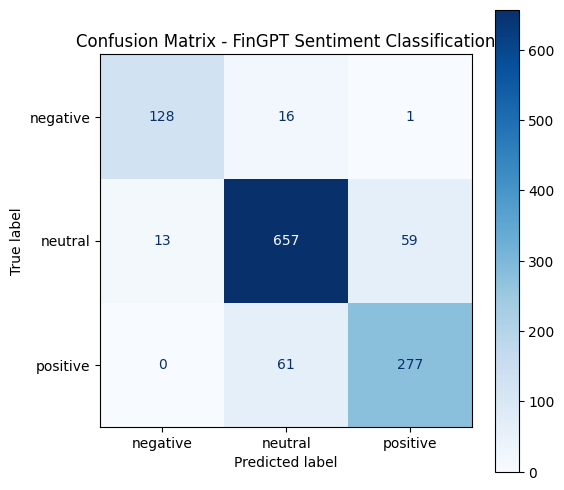

In [7]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Generate the confusion matrix
# cm = confusion_matrix(results_df["new_target"], results_df["new_out"], labels=["negative", "neutral", "positive"])

# # Plot the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
# fig, ax = plt.subplots(figsize=(6, 6))
# disp.plot(cmap='Blues', ax=ax, values_format='d')
# plt.title("Confusion Matrix - FinGPT Sentiment Classification")
# plt.grid(False)
# plt.show()
